In [1]:
import numpy as np
from sklearn import datasets

np.random.seed(42)

## Dataset Prerp

In [2]:
iris = datasets.load_iris()

x = iris.data[:, :2]  # we only take the first two features.
y = iris.target

class_names = iris.target_names
descriptions = iris.DESCR

In [3]:
print(descriptions)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
x.shape

(150, 2)

### Dataset split

In [5]:
num_sample, num_feature = x.shape
num_class = len(class_names)

In [6]:
test_size = num_sample // 3

random_idxs = np.random.permutation(num_sample)


x_train = x[random_idxs[:-test_size]]
y_train = y[random_idxs[:-test_size]]

x_test = x[random_idxs[-test_size:]]
y_test = y[random_idxs[-test_size:]]

In [7]:
x_test.shape

(50, 2)

## KNN Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

y_pred

array([0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       0, 1, 1, 0, 2, 2])

In [9]:
s = 0
for y, p in zip(y_test, y_pred):
    if y == p:
        s += 1
print(s/len(y_test))

0.58


In [10]:
clf.score(x_test, y_test)

0.58

### Try different hyperparameter

In [11]:
weights = ['uniform', 'distance']
ns = range(1, 20)

best = {'score': 0, 'n': 0, 'w': 0}
for w in weights:
    for n in ns:
        clf = KNeighborsClassifier(n_neighbors=n, weights=w)
        clf.fit(x_train, y_train)
        acc = clf.score(x_test, y_test)
        print(acc)
        if acc > best['score']:
            best['score'] = acc
            best['n'] = n
            best['w'] = w

print("Best result:")
print("Accuracy:", best['score'])
print("n_neighbors:", best['n'])
print("weights:", best['w'])

0.68
0.54
0.58
0.64
0.68
0.68
0.72
0.74
0.74
0.66
0.74
0.7
0.68
0.66
0.7
0.72
0.7
0.7
0.7
0.68
0.68
0.56
0.66
0.62
0.62
0.66
0.68
0.72
0.72
0.7
0.68
0.68
0.68
0.68
0.68
0.68
0.68
0.68
Best result:
Accuracy: 0.74
n_neighbors: 8
weights: uniform


In [12]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)

clf.predict_proba(x_test)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [0. , 0.2, 0.8],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0.6, 0.4],
       [0. , 0.4, 0.6],
       [0. , 0.4, 0.6],
       [0.2, 0.8, 0. ],
       [0. , 0.6, 0.4],
       [0.4, 0.6, 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0.6, 0.4],
       [0. , 0.4, 0.6],
       [0. , 0.4, 0.6],
       [0. , 0. 

## Visualizing

In [13]:
from typing import Any
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



In [14]:
def make_mesh_grid(x0: np.ndarray, x1: np.ndarray) -> np.ndarray:
    step_width = 0.05
    offset = 0.5
    x0a = np.arange(np.min(x0) - offset, np.max(x0) + offset, step_width)
    x1a = np.arange(np.min(x1) - offset, np.max(x1) + offset, step_width)
    xx0, xx1 = np.meshgrid(x0a, x1a)
    return xx0, xx1

In [17]:
def plot_decision_border(
    clf: KNeighborsClassifier,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
) -> None:
    fig, ax = plt.subplots(figsize=(12, 8))
    X0 = x_train[:,0]
    X1 = x_train[:,1]
    xx0, xx1, make_mesh_grid(X0, X1)


NameError: name 'xx0' is not defined

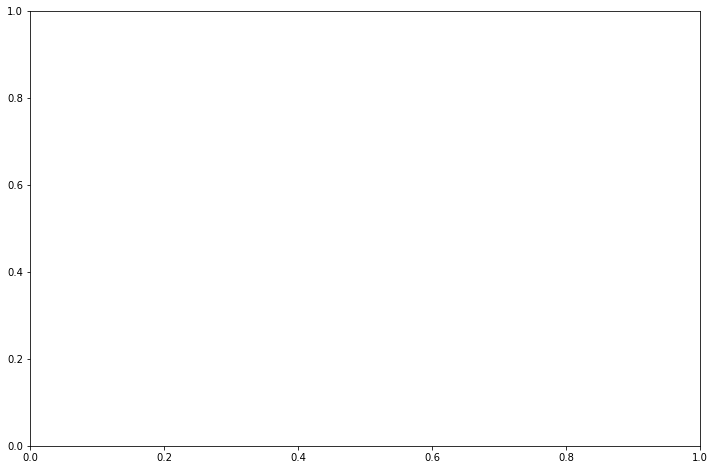

In [18]:
plot_decision_border(clf, x_train, x_test, y_train, y_test)